In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import scipy as stats
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/mammal_species_Weight_Brain.csv')

In [3]:

data

,Index,Body_Weight,Brain_weight
0,1.0,3.385,44.5
1,2.0,0.480,15.5
2,3.0,1.350,8.1
3,4.0,465.000,423.0
4,5.0,36.330,119.5
...,...,...,...
58,59.0,0.900,2.6
59,60.0,1.620,11.4
60,61.0,0.104,2.5
61,62.0,4.235,50.4


In [4]:
data1=data.drop('Index',axis=1)

In [5]:
data1.isna().sum()

Body_Weight     1
Brain_weight    1
dtype: int64

In [6]:
mean1=data1['Body_Weight'].mean()

In [7]:
data1['Body_Weight']=data1['Body_Weight'].fillna(mean1)

In [8]:
mean2=data1['Brain_weight'].mean()
data1['Brain_weight']=data1['Brain_weight'].fillna(mean2)

In [9]:
data1.isna().sum()

Body_Weight     0
Brain_weight    0
dtype: int64

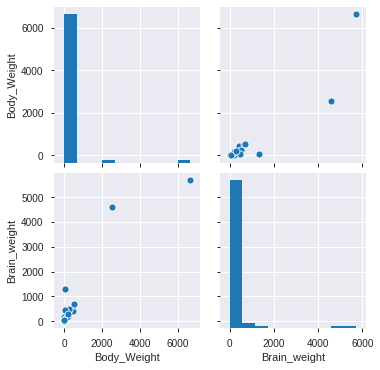

In [10]:
sns.pairplot(data1)

In [11]:
pandas_profiling.ProfileReport(data1)

In [30]:
x_data=data1[['Brain_weight']]
x_data.head(2)

,Brain_weight
0,44.5
1,15.5


In [31]:
y_data=data1['Body_Weight']
y_data.tail(2)

61      4.235000
62    198.789984
Name: Body_Weight, dtype: float64

In [32]:
#LinearRegression

In [33]:
lr=LinearRegression()

In [34]:
lr.fit(x_data.values.reshape(-1,1),y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lr.coef_

array([0.90291295])

In [36]:
lr.intercept_

-56.85554542859643

In [37]:
lr.score(x_data.values.reshape(-1,1),y_data)

0.8726620843043331

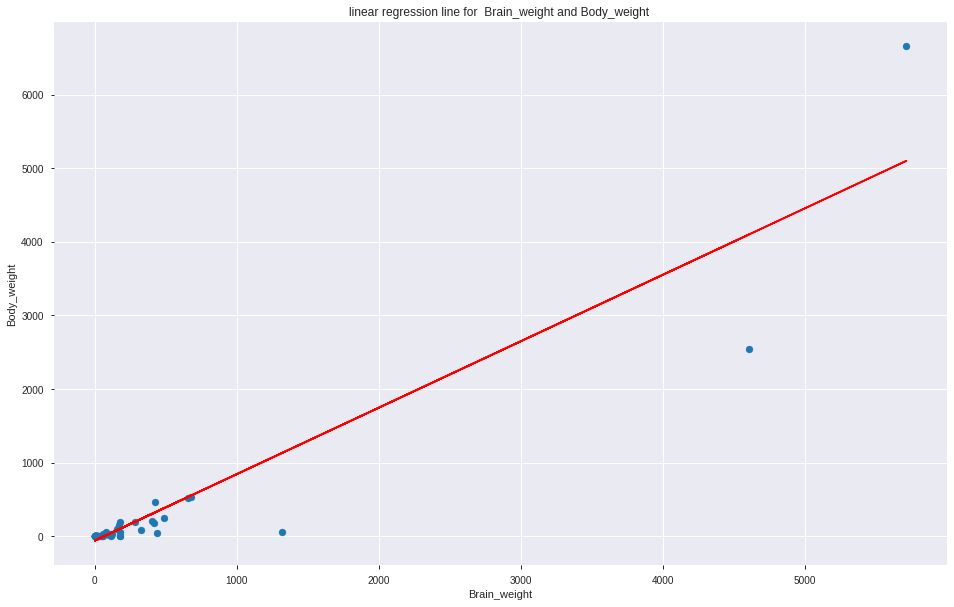

In [38]:
plt.figure(figsize=(16,10))
plt.title("linear regression line for  Brain_weight and Body_weight ")
plt.xlabel("Brain_weight")
plt.ylabel("Body_weight")
plt.scatter(x_data,y_data)
plt.plot(x_data,lr.intercept_+lr.coef_*x_data,'r')

In [39]:
#Ridge_Technique

In [40]:
X_traine,X_test,Y_traine,Y_test,=train_test_split(x_data,y_data,test_size=0.3,random_state=10)

In [41]:
#lr.fit(X_traine.values.reshape(-1,1),Y_traine)

In [42]:
train_score=lr.score(X_traine.values.reshape(-1,1),Y_traine)
train_score

0.8960051932078561

In [43]:
test_score=lr.score(X_test.values.reshape(-1,1),Y_test)
test_score

-0.9630635095399153

In [48]:
ols_reg=LinearRegression()
ols_reg.fit(X_traine,Y_traine)
ols_predic=ols_reg.predict(X_test)
#pd.DataFrame({'variable':x_data,'estimate':Y_test})

In [51]:
#initialize
ridge_reg=Ridge(alpha=0)
ridge_reg.fit(,Y_traine)
#ridge_df=pd.DataFrame({'variable':x_data,'estimate':Y_test})
#ridge_df

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [58]:
ridge_traine_pred=[]
ridge_test_pred=[]
alphas=np.arange(0,100,1)

for alpha in alphas:
    ridge_reg=Ridge(alpha=alpha)
    ridge_reg.fit(X_traine,Y_traine)
    var_name='estimation'+str(alpha)
    ridge_df[var_name]=Y_test
    
    #prediction
    ridge_traine_pred.append(ridge_reg.predict(X_traine))
    ridge_test_pred.append(ridge_reg.predict(X_test))
#ridge_df=ridge_df.set_index('variable').T.rename_axis('estimation')
#ridge_df

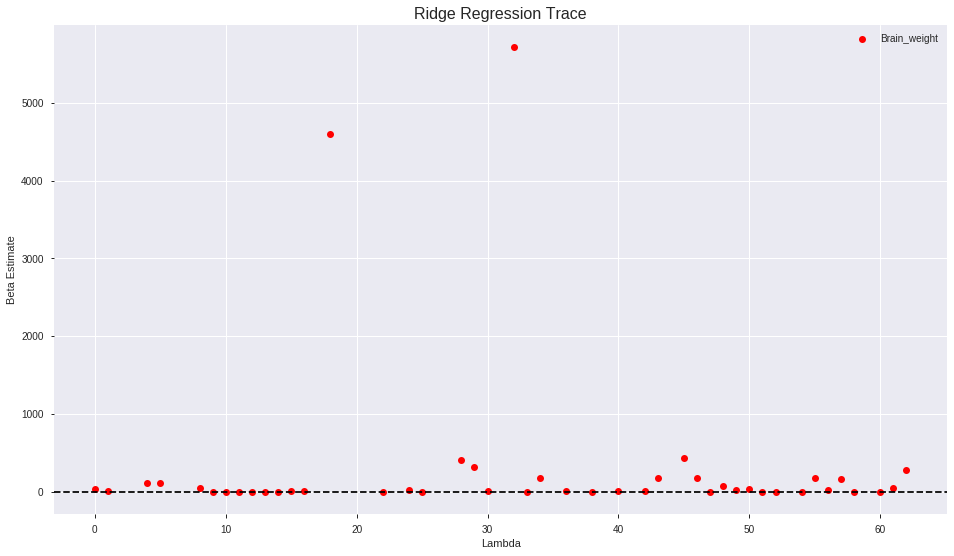

In [62]:
fig,ax=plt.subplots(figsize=(16,9))
ax.plot(X_traine['Brain_weight'],'or')
ax.axhline(y=0,color='black',linestyle='--')
ax.set_xlabel('Lambda')
ax.set_ylabel('Beta Estimate')
ax.set_title('Ridge Regression Trace',fontsize=16)
ax.legend(labels=['Brain_weight'])
ax.grid(True)